In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
np.random.seed(2)
bs = 64
path      = untar_data(URLs.PETS); path
path_anno = path/'annotations'
path_img  = path/'images'
fnames    = get_image_files(path_img)
pat       = r'/([^/]+)_\d+.jpg$'

In [38]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=224).normalize(imagenet_stats)

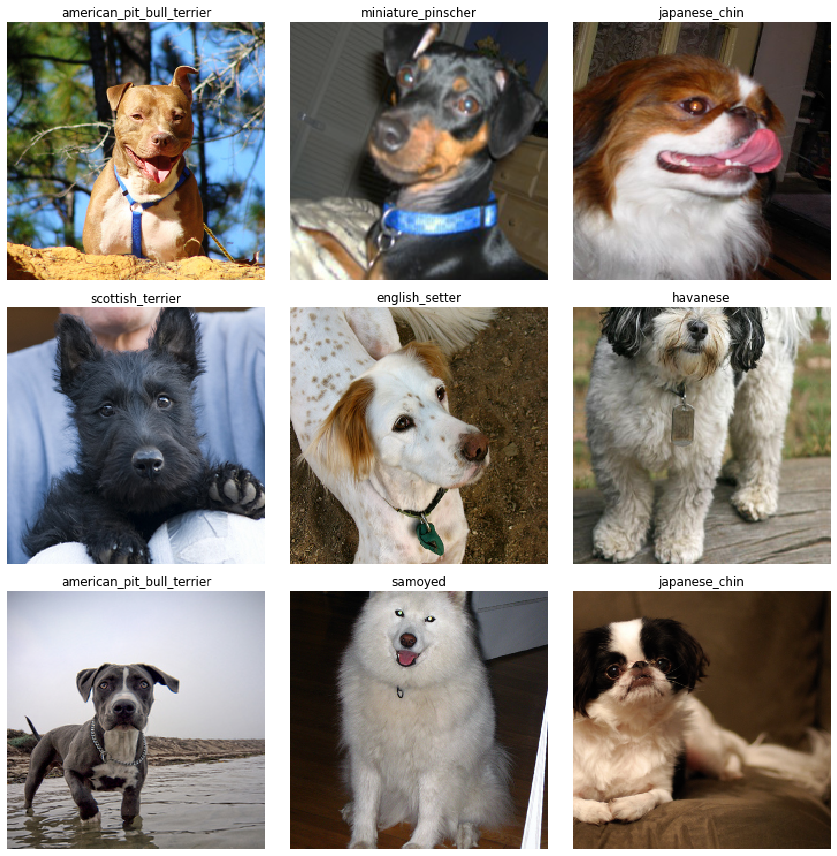

In [39]:
data.show_batch(rows=3, figsize=(12, 12))

In [40]:
learner = cnn_learner(data, models.resnet34, metrics=accuracy)

In [41]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [42]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.380588,0.294477,0.901894,00:16
1,0.627722,0.237182,0.916779,00:16
2,0.374823,0.204328,0.928281,00:16
3,0.267134,0.196251,0.933018,00:16


In [43]:
learner.save('resnet34-stage1')

In [44]:
learner.unfreeze()

In [45]:
interp = ClassificationInterpretation.from_learner(learner)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

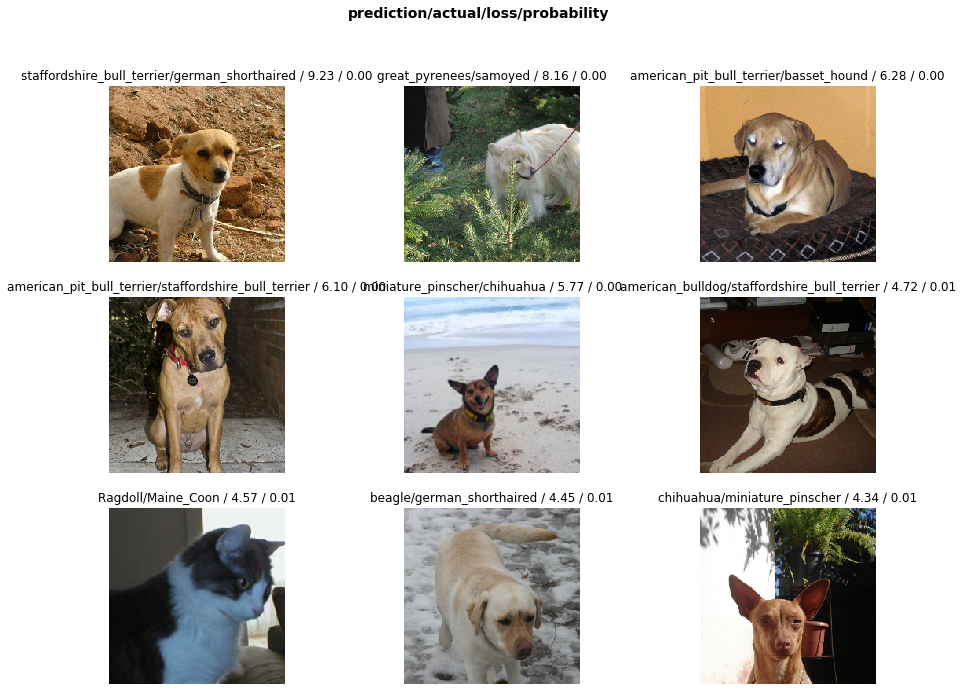

In [50]:
interp.plot_top_losses(9, figsize=(15, 11))

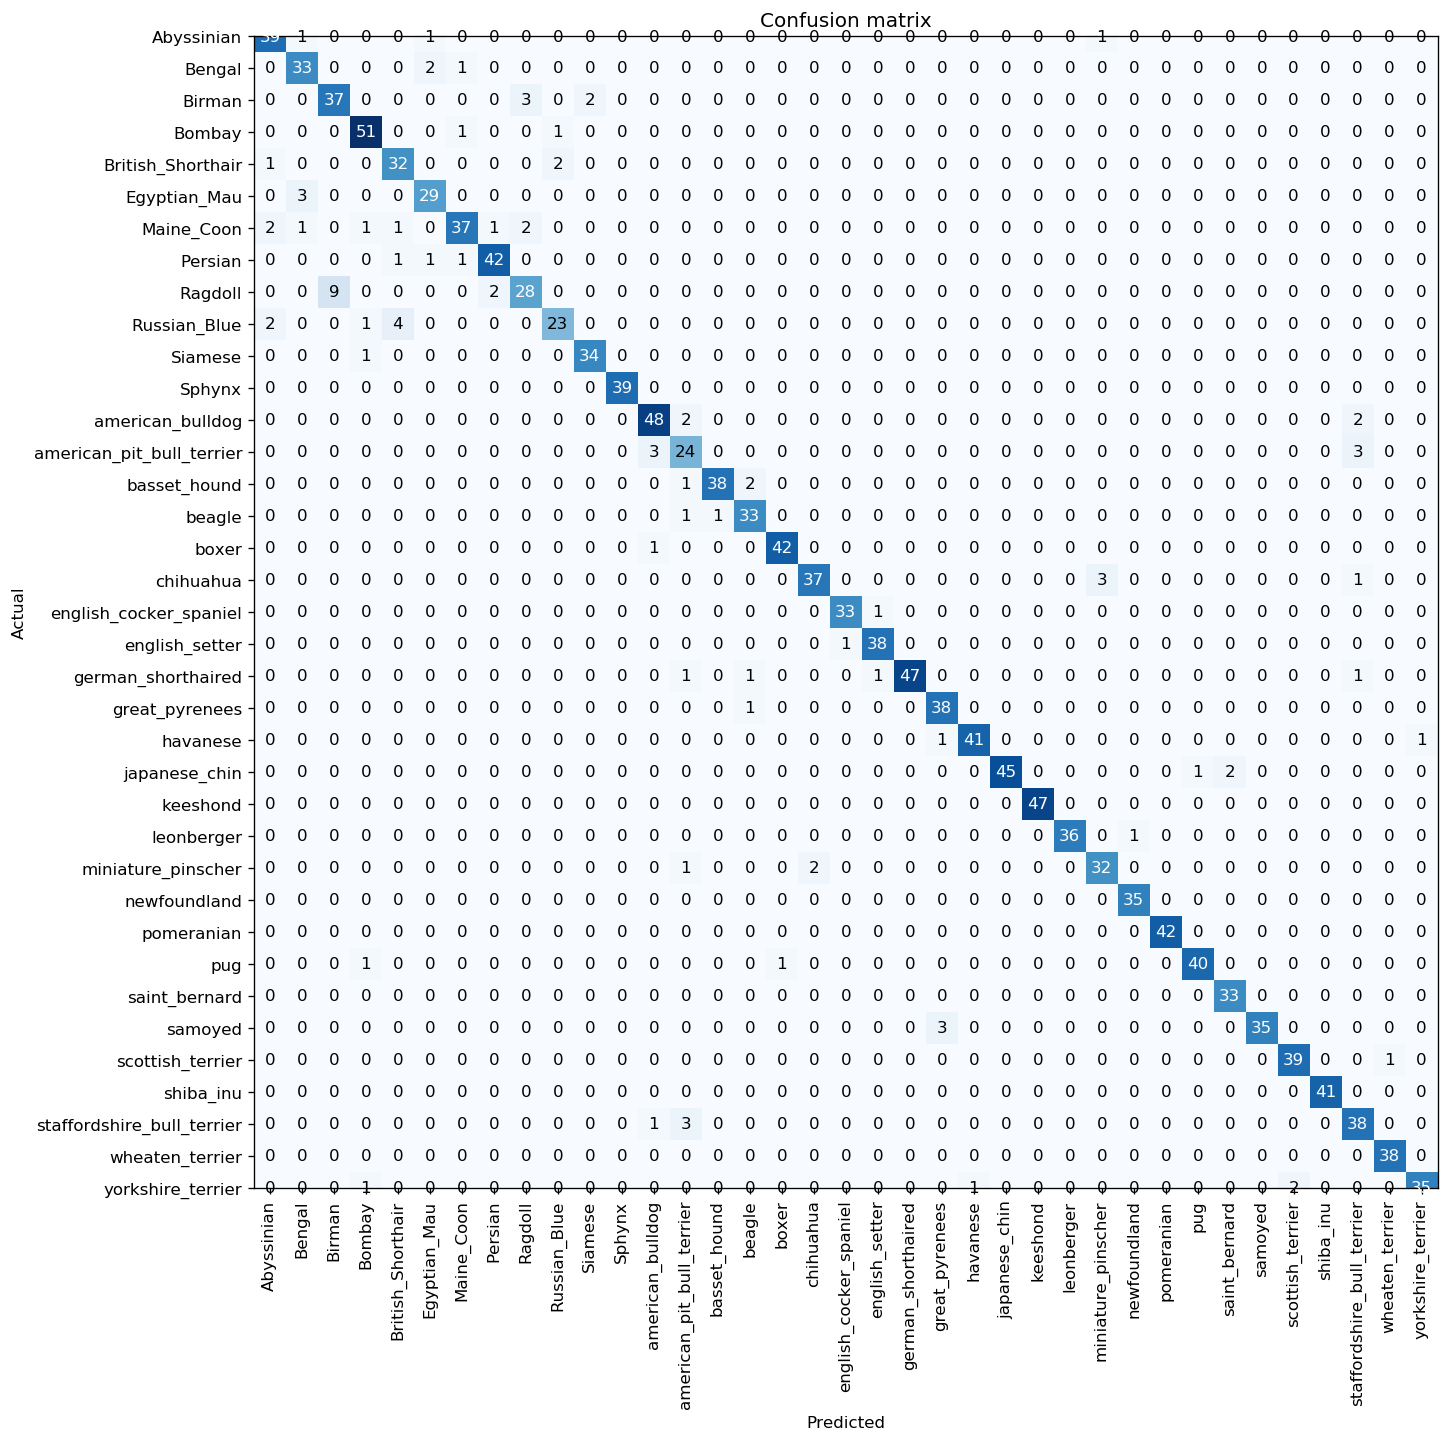

In [51]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=120)

In [52]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Abyssinian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('japanese_chin', 'saint_bernard', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

In [53]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


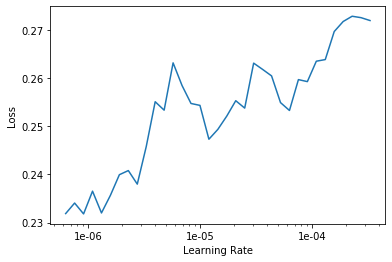

In [54]:
learner.recorder.plot()

In [55]:
learner.unfreeze()
learner.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.238056,0.184298,0.937077,00:21
1,0.242663,0.181860,0.935724,00:21


### Other formats with MNIST Sample

In [56]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/kai/.fastai/data/mnist_sample')

In [57]:
trans = get_transforms(do_flip=False)
data  = ImageDataBunch.from_folder(path, ds_tfms=trans, size=26)

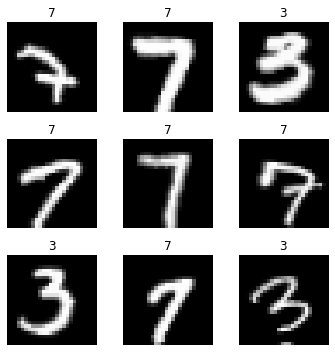

In [58]:
data.show_batch(rows=3, figsize=(5, 5))

In [59]:
learner = cnn_learner(data, models.resnet50, metrics=accuracy)

In [60]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.334534,0.242117,0.942591,00:10
1,0.147798,0.092871,0.965162,00:09
2,0.097343,0.044295,0.985770,00:09
3,0.072692,0.040876,0.986752,00:09


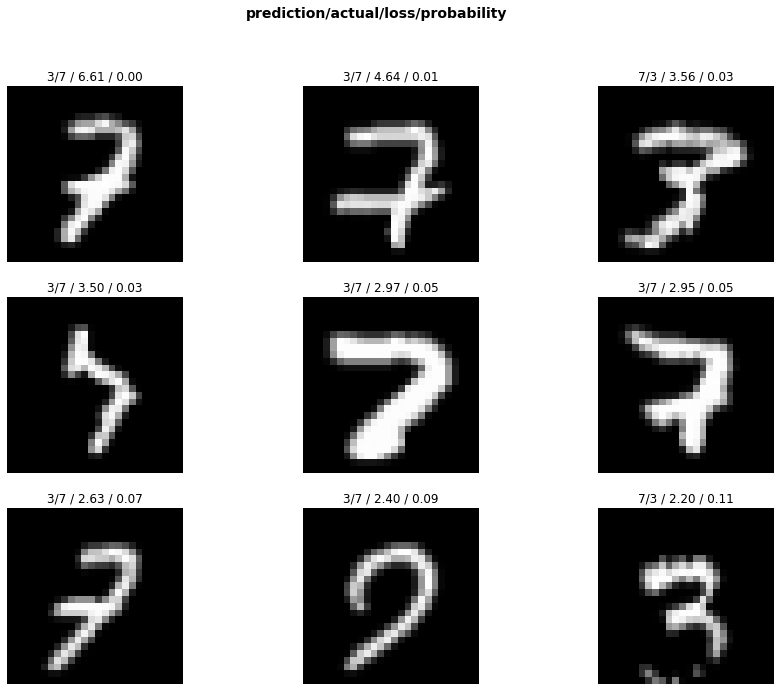

In [63]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9, figsize=(15, 11))